In [260]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv


In [261]:
import pandas as pd 

# Load datasets
train = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
test = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv')

train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [262]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [263]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [264]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [265]:
# Check null values
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Data analysis

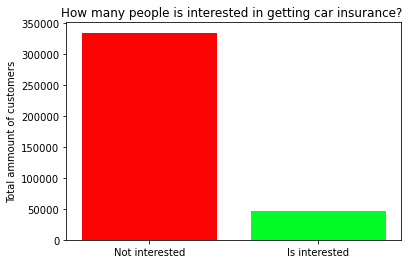

In [266]:
from matplotlib import pyplot as plt 

plt.bar(
    x = ['Not interested', 'Is interested'], 
    height = [train.Response.value_counts()[0], train.Response.value_counts()[1]], 
    color = ['#fc0303', '#03fc28']
); 
plt.title("How many people is interested in getting car insurance? ")
plt.ylabel('Total ammount of customers')
plt.show()

In [267]:
# Filtering only those who took an insurance
takers_index = train.Response == 1
takers = train[takers_index]

# Customers who are not taking car insurance
not_index = train.Response == 0 
not_takers = train[not_index]

Text(0, 0.5, 'Total ammount of customers')

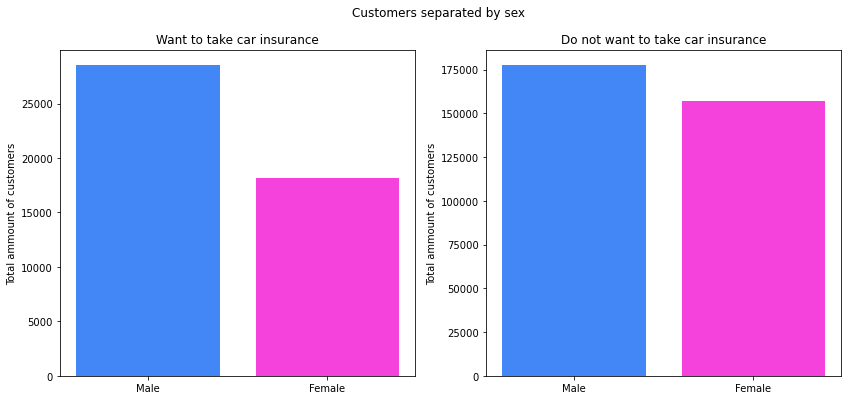

In [268]:
# Plot by sex

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Customers separated by sex")

ax1.bar(
    x = ['Male', 'Female'], 
    height = [takers.Gender.value_counts()[0], takers.Gender.value_counts()[1]], 
    color = ['#4287f5', '#f542dd']
); 
ax1.set_title("Want to take car insurance")
ax1.set_ylabel("Total ammount of customers")

ax2.bar(
    x = ['Male', 'Female'], 
    height = [not_takers.Gender.value_counts()[0], not_takers.Gender.value_counts()[1]], 
    color = ['#4287f5', '#f542dd']
); 
ax2.set_title("Do not want to take car insurance")
ax2.set_ylabel("Total ammount of customers")

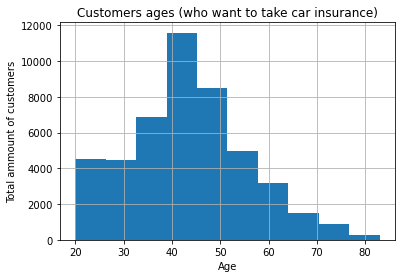

In [269]:
# Age plot 

plt.title("Customers ages (who want to take car insurance)")
plt.xlabel("Age")
plt.ylabel("Total ammount of customers")
takers.Age.hist()
plt.show()

# As we can see, most of the customers who take car insurance are aged between 30 and 50

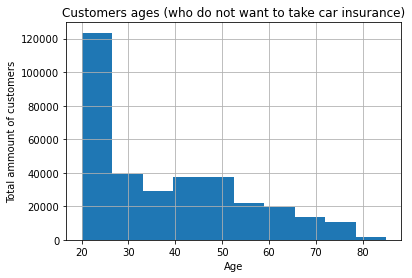

In [270]:
plt.title("Customers ages (who do not want to take car insurance)")
plt.xlabel("Age")
plt.ylabel("Total ammount of customers")
not_takers.Age.hist()
plt.show()

# Most people who do not want to take car insurance are young people

Text(0, 0.5, 'Total ammount of customers')

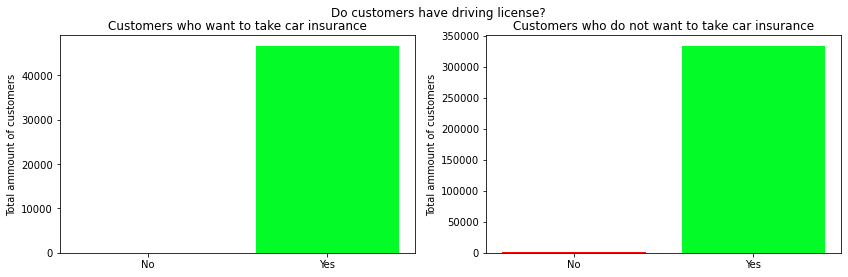

In [271]:
# Customers who has driving license

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Do customers have driving license?")

ax1.bar(
    x = ['No', 'Yes'], 
    height = [takers.Driving_License.value_counts()[0], takers.Driving_License.value_counts()[1]], 
    color = ['#fc0303', '#03fc28']
); 
ax1.set_title("Customers who want to take car insurance")
ax1.set_ylabel('Total ammount of customers')

ax2.bar(
    x = ['No', 'Yes'], 
    height = [not_takers.Driving_License.value_counts()[0], not_takers.Driving_License.value_counts()[1]], 
    color = ['#fc0303', '#03fc28']
); 
ax2.set_title("Customers who do not want to take car insurance")
ax2.set_ylabel('Total ammount of customers')

# Almost all customers, taking or not the car insurance, do have driving license. 

Text(0, 0.5, 'Total ammount of customers')

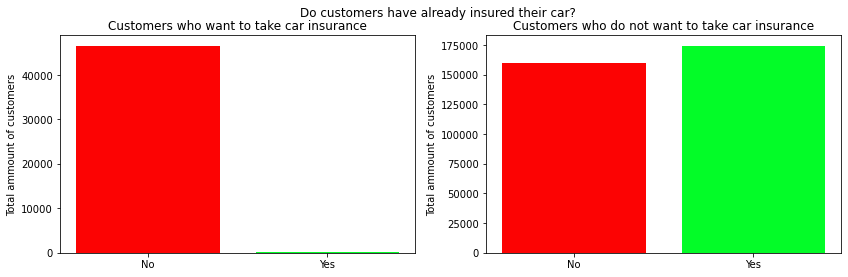

In [272]:
# Customers who have previously insured their car

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Do customers have already insured their car?")

ax1.bar(
    x = ['No', 'Yes'], 
    height = [takers.Previously_Insured.value_counts()[0], takers.Previously_Insured.value_counts()[1]], 
    color = ['#fc0303', '#03fc28']
); 
ax1.set_title("Customers who want to take car insurance")
ax1.set_ylabel('Total ammount of customers')

ax2.bar(
    x = ['No', 'Yes'], 
    height = [not_takers.Previously_Insured.value_counts()[0], not_takers.Previously_Insured.value_counts()[1]], 
    color = ['#fc0303', '#03fc28']
); 
ax2.set_title("Customers who do not want to take car insurance")
ax2.set_ylabel('Total ammount of customers')

# Most of those who want to take car insurance, do not have car insurance 

Text(0, 0.5, 'Total ammount of customers')

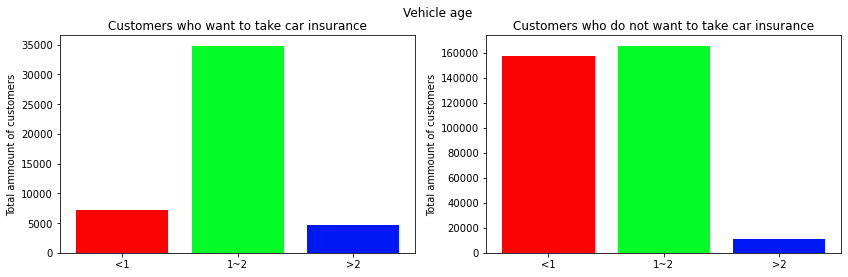

In [273]:
# Vehicle age of customer's cars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Vehicle age")

ax1.bar(
    x = ['<1', '1~2', '>2'], 
    height = [takers.Vehicle_Age.value_counts()[1], takers.Vehicle_Age.value_counts()[0], takers.Vehicle_Age.value_counts()[2]], 
    color = ['#fc0303', '#03fc28', '#0018f5']
); 
ax1.set_title("Customers who want to take car insurance")
ax1.set_ylabel('Total ammount of customers')

ax2.bar(
    x = ['<1', '1~2', '>2'], 
    height = [not_takers.Vehicle_Age.value_counts()[1], not_takers.Vehicle_Age.value_counts()[0], not_takers.Vehicle_Age.value_counts()[2]], 
    color = ['#fc0303', '#03fc28', '#0018f5']
); 
ax2.set_title("Customers who do not want to take car insurance")
ax2.set_ylabel('Total ammount of customers')

Text(0, 0.5, 'Total ammount of customers')

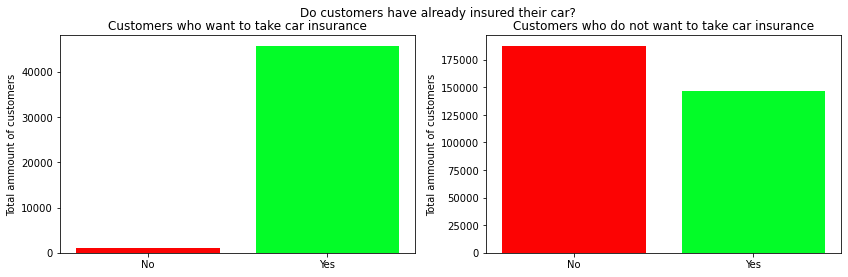

In [274]:
# Customers who have previously got the vehicle damaged

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Do customers have already insured their car?")

ax1.bar(
    x = ['No', 'Yes'], 
    height = [takers.Vehicle_Damage.value_counts()[1], takers.Vehicle_Damage.value_counts()[0]], 
    color = ['#fc0303', '#03fc28']
); 
ax1.set_title("Customers who want to take car insurance")
ax1.set_ylabel('Total ammount of customers')

ax2.bar(
    x = ['No', 'Yes'], 
    height = [not_takers.Vehicle_Damage.value_counts()[0], not_takers.Vehicle_Damage.value_counts()[1]], 
    color = ['#fc0303', '#03fc28']
); 
ax2.set_title("Customers who do not want to take car insurance")
ax2.set_ylabel('Total ammount of customers')

# Customers want to take car insurance because they are affraid of having another accident 

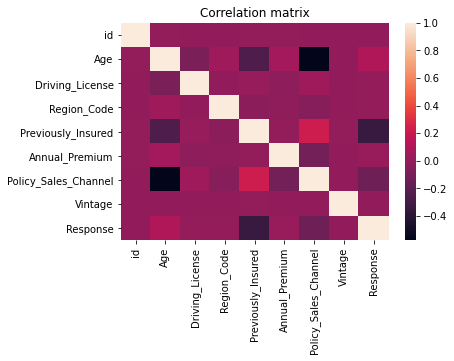

In [275]:
import seaborn as sns 

plt.title("Correlation matrix")
sns.heatmap(train.corr()); 
plt.show()

In [276]:
takers.Vintage.unique()

array([217,  27,  72,  46, 147, 102,  49, 232, 283,  81, 167, 281,  22,
       229, 216, 156, 155,  19, 234, 212, 258, 128, 105, 207, 263,  23,
       190, 242, 203, 237,  69, 199,  59,  32, 189, 116, 221,  96, 172,
       171, 222, 160, 277, 186, 158,  87,  86, 247,  30, 113, 126, 164,
       119, 244, 135, 204, 122,  39, 120, 184,  80,  82,  13, 288, 101,
       133,  35, 238, 166,  21, 227,  60, 255, 287, 109, 253, 146,  37,
       197, 107, 180, 278, 285,  10, 267,  28,  26,  74, 223, 161, 129,
       252, 205, 142, 103, 236, 295,  12, 100,  55, 127,  71, 124,  85,
       206,  97, 148, 151,  47,  40, 220, 264,  70, 170, 270, 248, 136,
       141,  38,  56,  20, 173,  53, 108,  52,  68, 149,  63,  45,  14,
       185, 297,  41, 153, 286,  84, 183,  75, 188,  92, 195, 215, 298,
       289,  48, 225, 246, 265, 159,  51, 256, 213,  54, 240,  18, 176,
       125, 245, 106, 117, 276, 254,  76,  73, 174, 249, 211,  43, 138,
       210,  24, 112, 284,  77,  66, 293,  99, 290, 104, 177, 14

## Data preprocessing

In [277]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [278]:
train.replace(
    {
        'Male': 0, 'Female': 1, 
        'Yes': 1, 'No': 0, 
        '< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2
    }, 
    inplace = True
)

test.replace(
    {
        'Male': 0, 'Female': 1, 
        'Yes': 1, 'No': 0, 
        '< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2
    }, 
    inplace = True
)

train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [279]:
train.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [280]:
# Create a new feature: premium paid per day

train['Premium_Per_Day'] = (train.Annual_Premium / 365) * train.Vintage
test['Premium_Per_Day'] = (test.Annual_Premium / 365) * test.Vintage

train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Premium_Per_Day
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,24050.734247
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,16813.939726
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,2832.706849
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,15916.868493
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,2937.928767


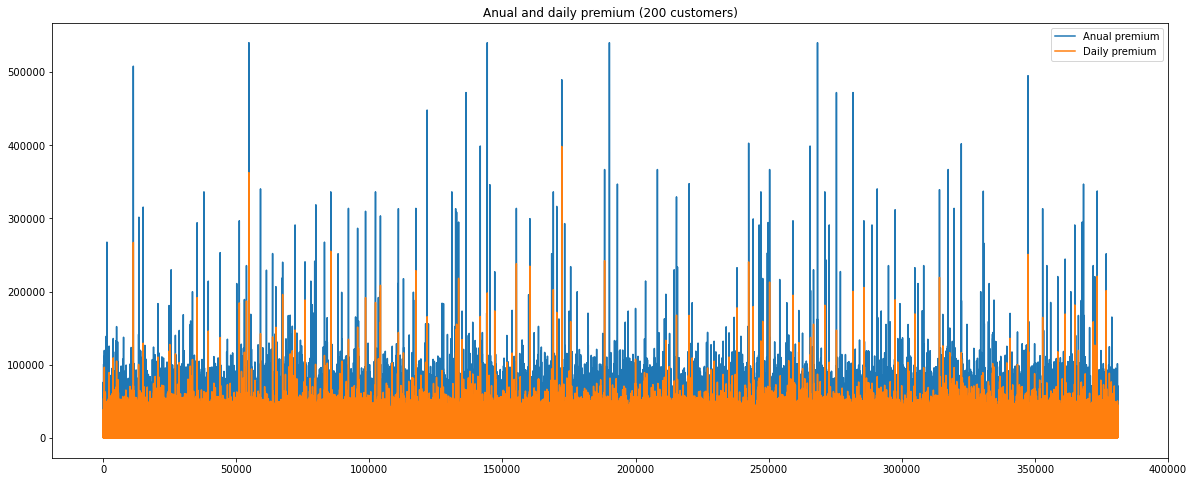

In [281]:
# Visualize the premium that customers pays 

plt.figure(figsize = (20, 8))
plt.plot(
    train.id, train.Annual_Premium, 
    label = "Anual premium", 
)
plt.plot(
    train.id, train.Premium_Per_Day, 
    label = "Daily premium"
)
plt.legend()
plt.title("Anual and daily premium (200 customers)")
plt.show()

In [282]:
print("Minium anual premium: ", min(train.Annual_Premium)) 
print("Maxium anual premium: ", max(train.Annual_Premium))
print("Median anual premium: ", train.Annual_Premium.mean())

Minium anual premium:  2630.0
Maxium anual premium:  540165.0
Median anual premium:  30564.389581458323


In [283]:
# Convert Annual_Premium into categorical values

train['Premium_Range'] = pd.cut(
    x = train.Annual_Premium, 
    bins = [0, 25000, 50000, 150000, np.inf], 
    labels = ['Low', 'Average', 'High', 'Very high']
)
test['Premium_Range'] = pd.cut(
    x = test.Annual_Premium, 
    bins = [0, 25000, 50000, 150000, np.inf], 
    labels = ['Low', 'Average', 'High', 'Very high']
)

In [284]:
# Convert Age into categorical values

train['Age_Range'] = pd.cut(
    x = train.Age, 
    bins = [0, 20, 40, 60, 100], 
    labels = ['Young', 'Adult', 'Senior', 'Old']
)
test['Age_Range'] = pd.cut(
    x = test.Age, 
    bins = [0, 20, 40, 60, 100], 
    labels = ['Young', 'Adult', 'Senior', 'Old']
)

In [285]:
# Convert Vintage days into months
train['Vintage_Months'] = np.ceil(train.Vintage / 30)
test['Vintage_Months'] = np.ceil(test.Vintage / 30)

In [286]:
# Filtering only those who took an insurance
takers_index = train.Response == 1
takers = train[takers_index]

# Customers who are not taking car insurance
not_index = train.Response == 0 
not_takers = train[not_index]

Text(0, 0.5, 'Total ammount of customers')

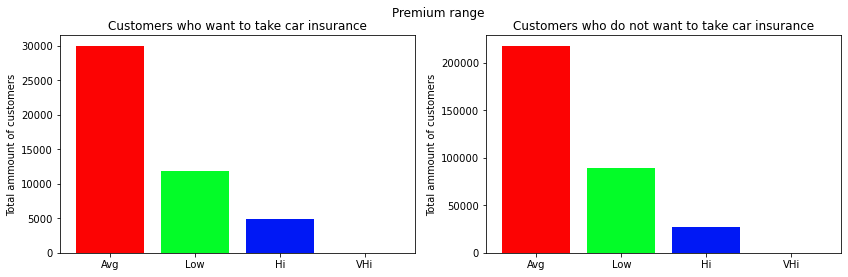

In [287]:
# Premium range

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Premium range")

ax1.bar(
    x = ['Avg', 'Low', 'Hi', 'VHi'], 
    height = [takers.Premium_Range.value_counts()[0], takers.Premium_Range.value_counts()[1], takers.Premium_Range.value_counts()[2], takers.Premium_Range.value_counts()[3]], 
    color = ['#fc0303', '#03fc28', '#0018f5', '#e342f5']
); 
ax1.set_title("Customers who want to take car insurance")
ax1.set_ylabel('Total ammount of customers')

ax2.bar(
    x = ['Avg', 'Low', 'Hi', 'VHi'], 
    height = [not_takers.Premium_Range.value_counts()[0], not_takers.Premium_Range.value_counts()[1], not_takers.Premium_Range.value_counts()[2], not_takers.Premium_Range.value_counts()[3]], 
    color = ['#fc0303', '#03fc28', '#0018f5', '#e342f5']
); 
ax2.set_title("Customers who do not want to take car insurance")
ax2.set_ylabel('Total ammount of customers')

Text(0, 0.5, 'Total ammount of customers')

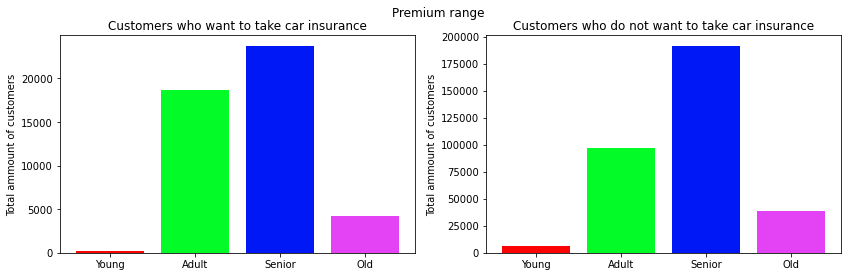

In [288]:
# Age range

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Premium range")

ax1.bar(
    x = ['Young', 'Adult', 'Senior', 'Old'], 
    height = [takers.Age_Range.value_counts()[3], takers.Age_Range.value_counts()[1], takers.Age_Range.value_counts()[0], takers.Age_Range.value_counts()[2]], 
    color = ['#fc0303', '#03fc28', '#0018f5', '#e342f5']
); 
ax1.set_title("Customers who want to take car insurance")
ax1.set_ylabel('Total ammount of customers')

ax2.bar(
    x = ['Young', 'Adult', 'Senior', 'Old'], 
    height = [not_takers.Age_Range.value_counts()[3], not_takers.Age_Range.value_counts()[1], not_takers.Age_Range.value_counts()[0], not_takers.Age_Range.value_counts()[2]], 
    color = ['#fc0303', '#03fc28', '#0018f5', '#e342f5']
); 
ax2.set_title("Customers who do not want to take car insurance")
ax2.set_ylabel('Total ammount of customers')

Text(0, 0.5, 'Total ammount of customers')

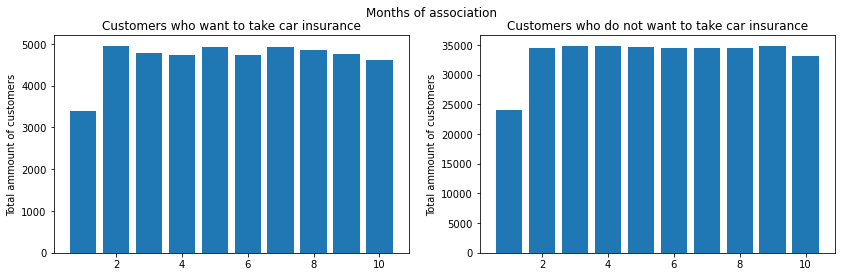

In [289]:
# Vintage months

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Months of association")

ax1.bar(
    x = np.arange(1, 11, 1), 
    height = [takers.Vintage_Months.value_counts().sort_index().values[i] for i in range(10)], 
); 
ax1.set_title("Customers who want to take car insurance")
ax1.set_ylabel('Total ammount of customers')

ax2.bar(
    x = np.arange(1, 11, 1), 
    height = [not_takers.Vintage_Months.value_counts().sort_index().values[i] for i in range(10)],  
); 
ax2.set_title("Customers who do not want to take car insurance")
ax2.set_ylabel('Total ammount of customers')

In [290]:
# Drop some columns
train.drop(['Age', 'Vintage', 'Annual_Premium', 'id', 'Policy_Sales_Channel'], axis = 1, inplace = True)
test.drop(['Age', 'Vintage', 'Annual_Premium', 'id', 'Policy_Sales_Channel'], axis = 1, inplace = True)

In [291]:
train.head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Premium_Per_Day,Premium_Range,Age_Range,Vintage_Months
0,0,1,28.0,0,2,1,1,24050.734247,Average,Senior,8.0
1,0,1,3.0,0,1,0,0,16813.939726,Average,Old,7.0
2,0,1,28.0,0,2,1,1,2832.706849,Average,Senior,1.0
3,0,1,11.0,1,0,0,0,15916.868493,Average,Adult,7.0
4,1,1,41.0,1,0,0,0,2937.928767,Average,Adult,2.0


In [292]:
train.replace(
    {
        'Average': 0, 'Low': 1, 'High': 2, 'Very high': 3, 
        'Young': 0, 'Adult': 1, 'Senior': 2, 'Old': 3, 
    },
    inplace = True
)
test.replace(
    {
        'Average': 0, 'Low': 1, 'High': 2, 'Very high': 3, 
        'Young': 0, 'Adult': 1, 'Senior': 2, 'Old': 3, 
    },
    inplace = True
)

train.head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Premium_Per_Day,Premium_Range,Age_Range,Vintage_Months
0,0,1,28.0,0,2,1,1,24050.734247,0,2,8.0
1,0,1,3.0,0,1,0,0,16813.939726,0,3,7.0
2,0,1,28.0,0,2,1,1,2832.706849,0,2,1.0
3,0,1,11.0,1,0,0,0,15916.868493,0,1,7.0
4,1,1,41.0,1,0,0,0,2937.928767,0,1,2.0


## Modeling and evaluation 

In [293]:
X = train.drop(['Response'], axis=1)
y = train.Response